### Data Understanding
1.	Step: This represents number of steps taken to perform the whole transaction i.e. 1 step equals 1 transaction.
2.	Type: Type of online transaction.
3.	Amount: The amount of the transaction.
4.	NameOrig: ID of the Customer starting the transaction.
5.	OldbalanceOrg: States the Balance of Origin account before the transaction initiated.
6.	NewbalanceOrig: States the Balance of Origin account after the transaction performed.
7.	NameDest:  ID of the Recipient customer of the transaction.
8.	OldbalanceDest: States the Initial Balance of Recipient account before the transaction credited.
9.	NewbalanceDest: States the New Balance of recipient after the transaction being credited.
10.	IsFraud: ( Target Variable )- Is the transaction identified as Fraud or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset


Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
 92% 163M/178M [00:02<00:00, 60.3MB/s]
100% 178M/178M [00:02<00:00, 75.0MB/s]


In [4]:
!unzip online-payments-fraud-detection-dataset.zip -d ./dataset


Archive:  online-payments-fraud-detection-dataset.zip
  inflating: ./dataset/PS_20174392719_1491204439457_log.csv  


In [5]:
data = pd.read_csv('/content/dataset/PS_20174392719_1491204439457_log.csv')

In [6]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [7]:
data.shape

(6362620, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
sampled_data = data.sample(n=1000000, random_state=42)

In [10]:
sampled_data.shape

(1000000, 11)

In [11]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 3737323 to 1023694
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1000000 non-null  int64  
 1   type            1000000 non-null  object 
 2   amount          1000000 non-null  float64
 3   nameOrig        1000000 non-null  object 
 4   oldbalanceOrg   1000000 non-null  float64
 5   newbalanceOrig  1000000 non-null  float64
 6   nameDest        1000000 non-null  object 
 7   oldbalanceDest  1000000 non-null  float64
 8   newbalanceDest  1000000 non-null  float64
 9   isFraud         1000000 non-null  int64  
 10  isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 91.6+ MB


In [12]:
sampled_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
sampled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,1000000.0,2.435123e+02,1.424160e+02,1.0,156.0000,239.00,3.350000e+02,7.420000e+02
amount,1000000.0,1.804999e+05,6.170112e+05,0.0,13360.2925,74878.64,2.092836e+05,6.933732e+07
oldbalanceOrg,1000000.0,8.319644e+05,2.884868e+06,0.0,0.0000,14256.13,1.071842e+05,4.039905e+07
newbalanceOrig,1000000.0,8.534179e+05,2.921068e+06,0.0,0.0000,0.00,1.443272e+05,3.795009e+07
oldbalanceDest,1000000.0,1.105606e+06,3.417108e+06,0.0,0.0000,132958.79,9.482025e+05,3.553805e+08
newbalanceDest,1000000.0,1.230483e+06,3.698862e+06,0.0,0.0000,215351.62,1.115964e+06,3.560159e+08
isFraud,1000000.0,1.266000e-03,3.555838e-02,0.0,0.0000,0.00,0.000000e+00,1.000000e+00
isFlaggedFraud,1000000.0,3.000000e-06,1.732049e-03,0.0,0.0000,0.00,0.000000e+00,1.000000e+00


In [14]:
sampled_data["type"].unique()

array(['CASH_IN', 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT'],
      dtype=object)

In [15]:
sampled_data["type"].value_counts()

type
CASH_OUT    351432
PAYMENT     338453
CASH_IN     219961
TRANSFER     83696
DEBIT         6458
Name: count, dtype: int64

In [16]:
type = sampled_data["type"].value_counts()
transaction = type.index
quantity = type.values

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'xy'}, {'type':'domain'}]])

fig.add_trace(go.Bar(x=transaction, y=quantity), row=1, col=1)
fig.add_trace(go.Pie(labels=transaction, values=quantity), row=1, col=2)

fig.update_layout(title_text="Distribution of Transaction Type")
fig.show()


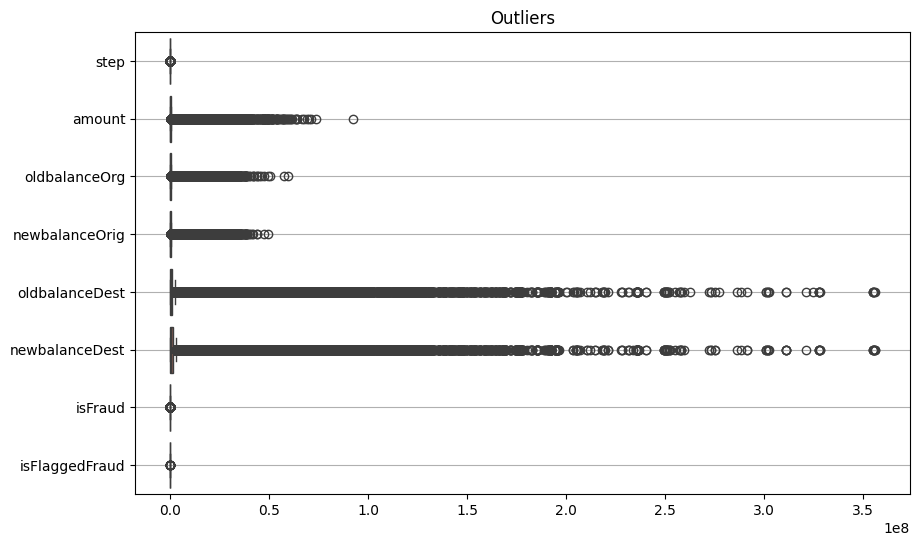

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h')
plt.title('Outliers')
plt.grid(axis='y')
plt.show()

<Axes: xlabel='amount', ylabel='step'>

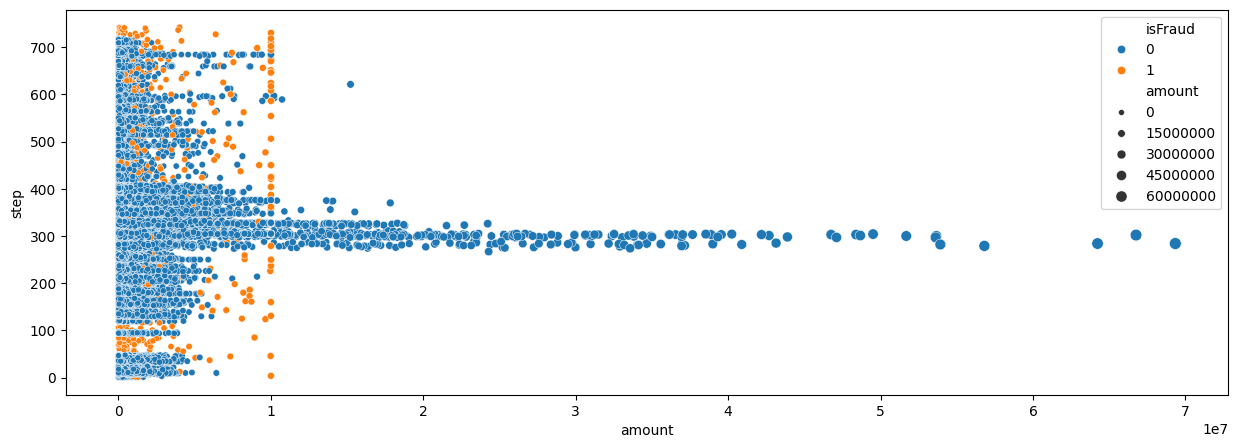

In [19]:
# Creating scatterplot on nos. of steps used basis the amount of each transaction using filter as Fraud
# Observed more Frauds are occuring in samller Amount and large nos of steps having few outliers as well
plt.figure(figsize=(15,5))
sns.scatterplot(data=sampled_data,x='amount',y='step',hue='isFraud',size='amount')

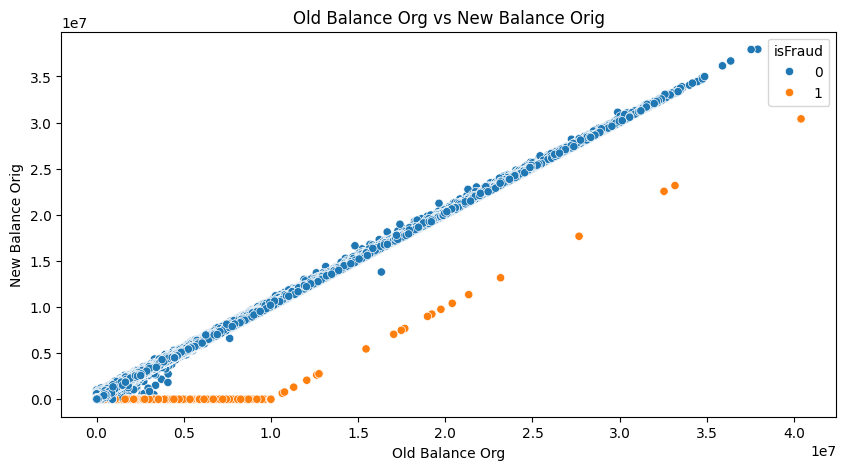

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=sampled_data)
plt.xlabel('Old Balance Org')
plt.ylabel('New Balance Orig')
plt.title('Old Balance Org vs New Balance Orig')
plt.show()

### With crosstab here we identify the predominent Type of Fraud transactions
It is observed all Fraudulent Transactions are either 'Cash Out' or 'Transfer' and ploted the amount of each transaction Type

In [21]:
CrosstabResult=pd.crosstab(index=data.type,columns=sampled_data.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,219961,0
CASH_OUT,350801,631
DEBIT,6458,0
PAYMENT,338453,0
TRANSFER,83061,635


<Axes: xlabel='type'>

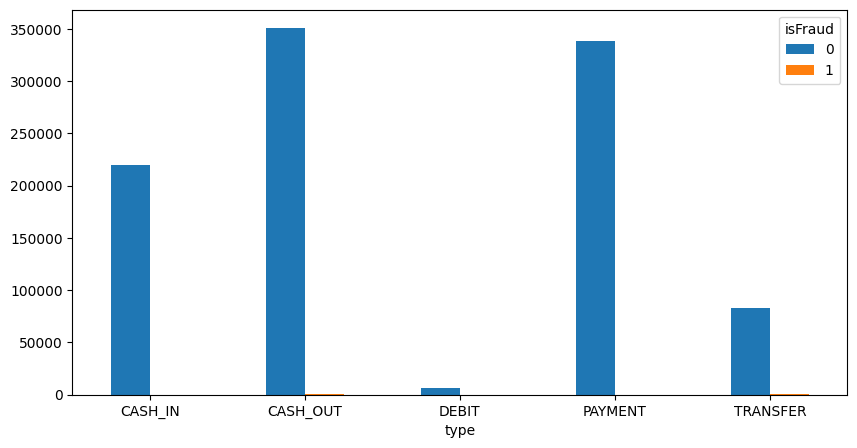

In [22]:
# Grouped bar chart between TYPE and ISFRAUD
## Clearly observed high nos of Fraud observed in Cash Out and Transfer type of transactions
CrosstabResult.plot.bar(figsize=(10,5), rot=0)

In [23]:
conunt_fraud = sampled_data['isFraud'].value_counts()
conunt_fraud

isFraud
0    998734
1      1266
Name: count, dtype: int64

In [24]:
import plotly.express as px

fraud_counts = sampled_data['isFraud'].value_counts()

fig_bar = px.bar(x=fraud_counts.index, y=fraud_counts.values,
                 labels={'x': 'Is Fraud', 'y': 'Count'},
                 title='Distribution of Fraud Transactions (Bar)')

fig_pie = px.pie(names=fraud_counts.index, values=fraud_counts.values,
                 title='Distribution of Fraud Transactions (Pie)')

fig_bar.show()
fig_pie.show()


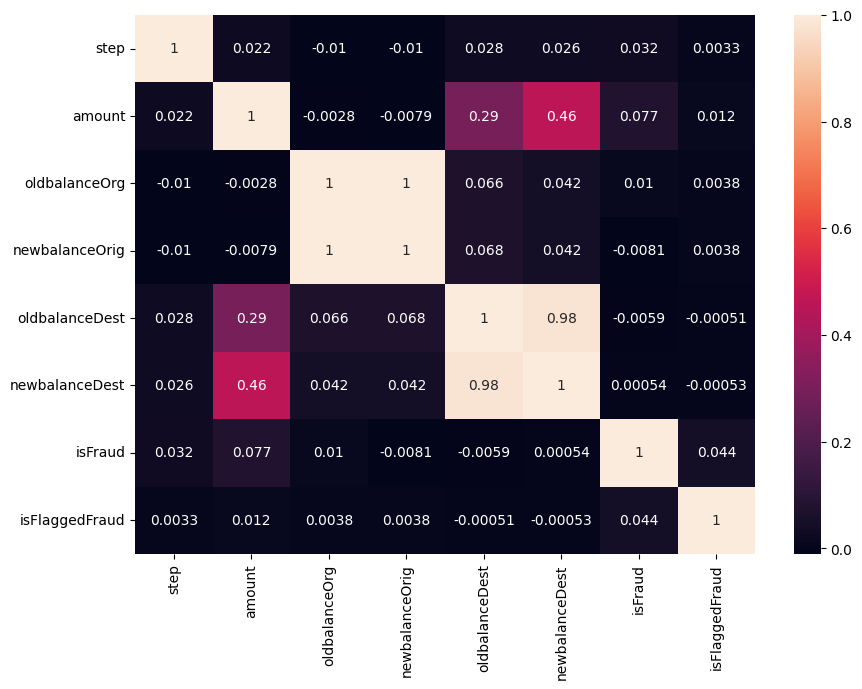

In [25]:
correlationdata = data.copy()
correlationdata.drop(['type' ,'nameOrig','nameDest' ], axis = 1, inplace = True)

fig = plt.figure(figsize =(10, 7))
sns.heatmap(correlationdata.corr(), annot = True)
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sampled_data['type'] = le.fit_transform(sampled_data['type'])

### For our analysis we dropped the variables - Origin account Name & Destination account name from dataset as they are redundant and has no role to determine Fraud transaction

In [27]:
x = sampled_data.drop(['nameOrig','nameDest','isFraud'], axis=1)
y = sampled_data['isFraud']

In [28]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
3737323,278,0,330218.42,20866.00,351084.42,452419.57,122201.15,0
264914,15,3,11647.08,30370.00,18722.92,0.00,0.00,0
85647,10,0,152264.21,106589.00,258853.21,201303.01,49038.80,0
5899326,403,4,1551760.63,0.00,0.00,3198359.45,4750120.08,0
2544263,206,0,78172.30,2921331.58,2999503.88,415821.90,337649.60,0
...,...,...,...,...,...,...,...,...
440547,18,3,8418.66,0.00,0.00,0.00,0.00,0
1909346,166,1,123558.56,0.00,0.00,270455.37,394013.92,0
1601624,156,3,37283.53,420290.00,383006.47,0.00,0.00,0
4815801,346,1,246299.15,90788.00,0.00,0.00,246299.15,0


In [29]:
y

3737323    0
264914     0
85647      0
5899326    0
2544263    0
          ..
440547     0
1909346    0
1601624    0
4815801    0
1023694    0
Name: isFraud, Length: 1000000, dtype: int64

In [30]:
label_counts = sampled_data['isFraud'].value_counts()

label_percentage = sampled_data['isFraud'].value_counts(normalize=True) * 100

print( label_counts)
print(label_percentage)

isFraud
0    998734
1      1266
Name: count, dtype: int64
isFraud
0    99.8734
1     0.1266
Name: proportion, dtype: float64


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [32]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=[0, 1], y=y)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}



In [33]:
import plotly.express as px

fraud_counts = y.value_counts()

fig_bar = px.bar(x=fraud_counts.index, y=fraud_counts.values,
                 labels={'x': 'Is Fraud', 'y': 'Count'},
                 title='Distribution of Fraud Transactions (Bar)')

fig_pie = px.pie(names=fraud_counts.index, values=fraud_counts.values,
                 title='Distribution of Fraud Transactions (Pie)')

fig_bar.show()
fig_pie.show()


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### ML Classification Model Application - Since our Target Variable i.e. IsFraud, has discrete binary outcome that belongs to class 0 or 1
model1 = Decision Tree Classifier

model2 = Logistic Regression

model3 = Random Forest Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)
model1.score(x_test, y_test)


0.99955

In [36]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.99884

In [37]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)
model3.score(x_test, y_test)

0.999715

#### Model1 - SVM

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report , precision_recall_curve, roc_curve, auc
model_pred_test = model1.predict(x_test)
accuracy_score(y_test, model_pred_test)

0.99955

In [39]:
conf_matrix = confusion_matrix(y_test, model_pred_test)
conf_matrix

array([[199720,     47],
       [    43,    190]])

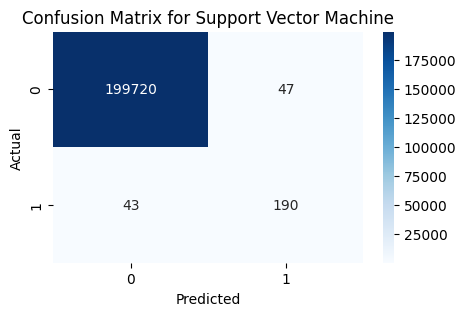

In [40]:
# Plotting the confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

In [41]:
print(classification_report(y_test, model_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199767
           1       0.80      0.82      0.81       233

    accuracy                           1.00    200000
   macro avg       0.90      0.91      0.90    200000
weighted avg       1.00      1.00      1.00    200000



#### Model2 - Logisitic Regression

In [42]:
model2_pred_test = model2.predict(x_test)
accuracy_score(y_test, model2_pred_test)

0.99884

In [43]:
conf_matrix2 = confusion_matrix(y_test,model2_pred_test)
conf_matrix2

array([[199765,      2],
       [   230,      3]])

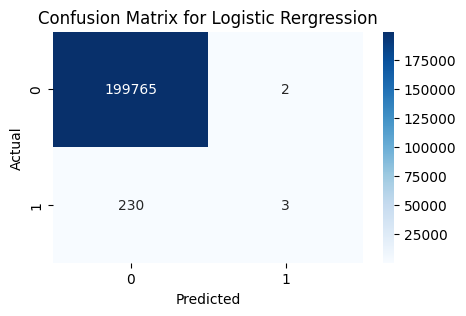

In [44]:
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Rergression')
plt.show()

In [45]:
print(classification_report(y_test, model2_pred_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199767
           1       0.60      0.01      0.03       233

    accuracy                           1.00    200000
   macro avg       0.80      0.51      0.51    200000
weighted avg       1.00      1.00      1.00    200000



#### Model3 - Random Forest

In [46]:
model3_pred_test = model3.predict(x_test)
accuracy_score(y_test, model3_pred_test)

0.999715

In [47]:
conf_matrix3 = confusion_matrix(y_test, model3_pred_test)
conf_matrix2

array([[199765,      2],
       [   230,      3]])

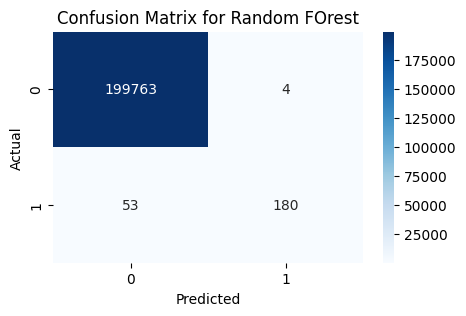

In [48]:
# Plotting the confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random FOrest')
plt.show()

In [49]:
print(classification_report(y_test, model3_pred_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199767
           1       0.98      0.77      0.86       233

    accuracy                           1.00    200000
   macro avg       0.99      0.89      0.93    200000
weighted avg       1.00      1.00      1.00    200000



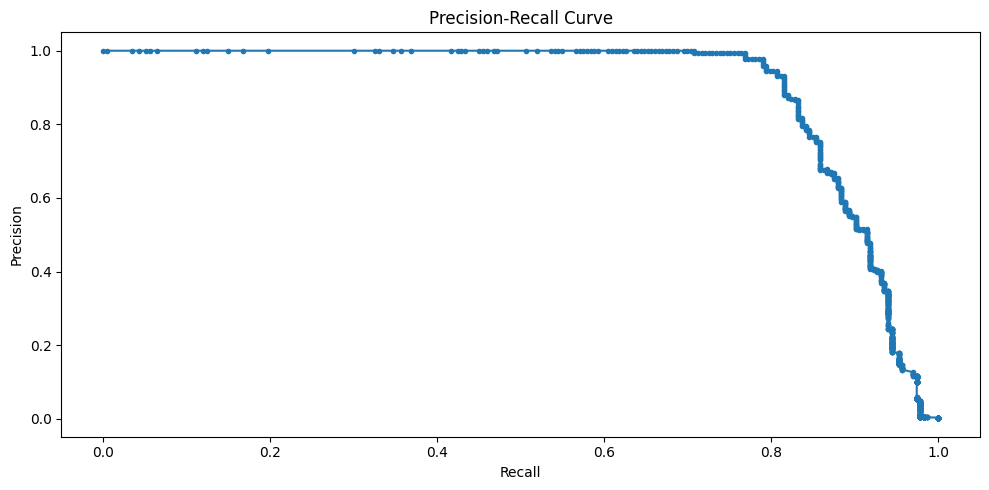

In [50]:
y_scores = model3.predict_proba(x_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score

def gini_coefficient(y_true, y_pred):
    # حساب AUC
    auc = roc_auc_score(y_true, y_pred)
    # حساب Gini Coefficient
    gini = 2 * auc - 1
    return f' the auc {auc} the gini {gini}'

In [52]:
gini = gini_coefficient(y_test, model3_pred_test)

In [53]:
gini

' the auc 0.8862560827570127 the gini 0.7725121655140255'

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.integrate

predictions = model3_pred_test

actual = y_test

In [55]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=float) # Change np.float to float
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [56]:
gini_predictions = gini(actual, predictions)
gini_max = gini(actual, actual)
ngini= gini_normalized(actual, predictions)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.397, Max. Gini: 0.499, Normalized Gini: 0.796


In [57]:

sampled_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,0,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,15,3,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,10,0,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,403,4,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,206,0,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [58]:
# prompt: save data in my computer

from google.colab import files
sampled_data.to_csv('sampled_data.csv', index=False)
files.download('sampled_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
!pip install joblib

In [65]:
import joblib

# Save the model directly using joblib.dump
joblib.dump(model3_pred_test, 'model.joblib')
# It's recommended to use '.joblib' as the file extension for joblib files

['model.joblib']